# Computer Science Group 3

Members:
1.	Arya Pradeep Menon (K2275592)
2.	Gudikota Dharani Kumar Gupta (K2203537)
3.	Alan Jose Tom (K2211586)
4.	Alan Vinodh (K2172630)


# Import libraries

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import np_utils
from keras.applications import VGG16
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Model, load_model

# Load Data

In [ ]:
# Define data path and image dimensions
# data_path = 'path/to/BreastMNIST/dataset'
data_path = np.load('/content/drive/MyDrive/Colab Notebooks/bloodmnist.npz')
img_width, img_height = 50, 50
with data_path as data:
  x_train = data['train_images']
  y_train = data['train_labels']
  x_val = data['val_images']
  y_val = data['val_labels']
  x_test = data['test_images']
  y_test = data['test_labels']

In [ ]:
# Verify no records are missing
assert not np.any(np.isnan(x_train))
assert not np.any(np.isnan(y_train))
assert not np.any(np.isnan(x_test))
assert not np.any(np.isnan(y_test))

# Plot Sample

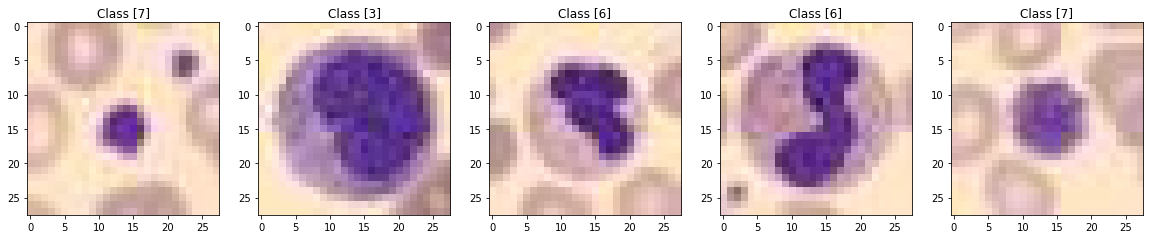

In [ ]:
fig, ax = plt.subplots(1, 5, figsize=(20, 5))
for i in range(5):
    ax[i].imshow(x_train[i], cmap = 'gray', interpolation = 'none')
    ax[i].set_title('Class {}'.format(y_train[i]))
plt.show()

# Data Preprocessing

In [ ]:
# Printing number of samples in each class

counts = np.bincount(y_train[:, 0])
print(counts)

# Calculating weights for dealing class imbalance problem

weight_for_0 = 1.0 / counts[0]
weight_for_1 = 1.0 / counts[1]
weight_for_2 = 1.0 / counts[2]
weight_for_3 = 1.0 / counts[3]
weight_for_4 = 1.0 / counts[4]
weight_for_5 = 1.0 / counts[5]
weight_for_6 = 1.0 / counts[6]
weight_for_7 = 1.0 / counts[7]

class_weight = {0: weight_for_0, 1: weight_for_1, 
                2: weight_for_2, 3: weight_for_3, 
                4: weight_for_4, 5: weight_for_5, 
                6: weight_for_6, 7: weight_for_7}

[ 852 2181 1085 2026  849  993 2330 1643]


In [ ]:
#resizing the dataset
x_train = tf.image.resize(x_train, (50, 50)) / 255.0
x_val = tf.image.resize(x_val, (50, 50)) / 255.0
x_test = tf.image.resize(x_test, (50, 50)) / 255.0

print("X_Train shape", x_train.shape)
print("X_Validation shape", x_val.shape)
print("X_Test shape", x_test.shape)

X_Train shape (11959, 50, 50, 3)
X_Validation shape (1712, 50, 50, 3)
X_Test shape (3421, 50, 50, 3)


In [ ]:
# One-hot Encoder
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

# Build Model

In [ ]:
# Define the VGG-16 model
model = VGG16(input_shape=(img_width, img_height, 3), weights='imagenet', include_top=False)

# Freeze the pre-trained layers
for layer in model.layers:
    layer.trainable = False

# Add custom layers for classification
x = model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(8, activation='softmax')(x)
model_final = Model(inputs=model.input, outputs=predictions)

model_final.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50, 50, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 50, 50, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 50, 50, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 25, 25, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 25, 25, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 25, 25, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

In [ ]:
# Compile the model

model_final.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Defining callback to avaoid overfitting

callbacks = [EarlyStopping(monitor="val_loss", patience=3),
ModelCheckpoint(filepath="/content/drive/MyDrive/Colab Notebooks/Models/Blood_VGG/best_model.h5",
monitor="val_loss",
save_best_only=True)]

In [ ]:
# Train the model

history = model_final.fit(x_train,y_train, epochs=50, callbacks = callbacks, validation_data=(x_val,y_val))

Epoch 1/50
374/374 [==============================] - 279s 744ms/step - loss: 1.1069 - accuracy: 0.5941 - val_loss: 0.7240 - val_accuracy: 0.7307
Epoch 2/50
374/374 [==============================] - 278s 743ms/step - loss: 0.7673 - accuracy: 0.7260 - val_loss: 0.5737 - val_accuracy: 0.7944
Epoch 3/50
374/374 [==============================] - 278s 744ms/step - loss: 0.6849 - accuracy: 0.7555 - val_loss: 0.5441 - val_accuracy: 0.7944
Epoch 4/50
374/374 [==============================] - 279s 745ms/step - loss: 0.6384 - accuracy: 0.7720 - val_loss: 0.5287 - val_accuracy: 0.7991
Epoch 5/50
374/374 [==============================] - 279s 746ms/step - loss: 0.6096 - accuracy: 0.7845 - val_loss: 0.4984 - val_accuracy: 0.8096
Epoch 6/50
374/374 [==============================] - 277s 742ms/step - loss: 0.5866 - accuracy: 0.7868 - val_loss: 0.4995 - val_accuracy: 0.8207
Epoch 7/50
374/374 [==============================] - 278s 744ms/step - loss: 0.5681 - accuracy: 0.7992 - val_loss: 0.4888 -

# Model Evaluation

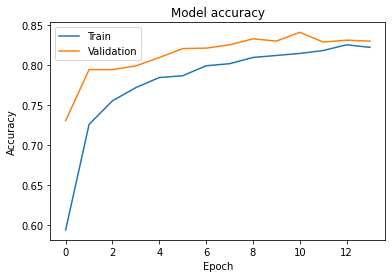

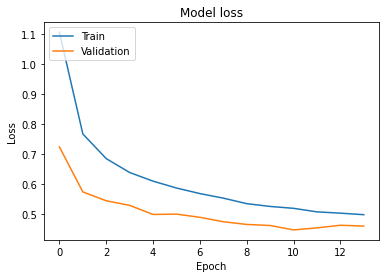

In [ ]:
# Plot the accuracy and loss curves
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
model_final = load_model("/content/drive/MyDrive/Colab Notebooks/Models/Blood_VGG/best_model.h5")
model_final.save("/content/drive/MyDrive/Colab Notebooks/Models/Blood_VGG/bloodVGG_1.h5")

In [ ]:
# Model evaluation based on validation set

score = model_final.evaluate(x_val, y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.4467300772666931
Test accuracy: 0.84112149477005


In [ ]:
# Making predictions on test set

y_pred = np.argmax(model_final.predict(x_test), axis=-1)
y_test = np.argmax(y_test, axis=-1)

107/107 [==============================] - 69s 640ms/step


In [ ]:
# Metrics Evaluation

print(classification_report(y_test, y_pred))

print("\nConfusion Matrix\n")
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.79      0.77       244
           1       0.86      0.88      0.87       624
           2       0.94      0.70      0.80       311
           3       0.65      0.78      0.71       579
           4       0.79      0.88      0.83       243
           5       0.73      0.44      0.55       284
           6       0.91      0.94      0.93       666
           7       0.97      0.97      0.97       470

    accuracy                           0.83      3421
   macro avg       0.82      0.80      0.80      3421
weighted avg       0.83      0.83      0.82      3421


Confusion Matrix

[[192  10   0  30  10   2   0   0]
 [  4 552   1  34   2  14  17   0]
 [  7   4 218  32  23   1  10  16]
 [ 28  35   4 453   8  28  23   0]
 [ 12   0   2  15 213   0   1   0]
 [ 14  21   1 116   4 125   3   0]
 [  0  18   1  17   5   1 624   0]
 [  0   2   5   0   5   0   4 454]]


# Dealing Class Imbalance

In [ ]:
history = model_final.fit(x_train,y_train, epochs=50, class_weight = class_weight, callbacks = callbacks, validation_data=(x_val,y_val))

Epoch 1/50
374/374 [==============================] - 276s 737ms/step - loss: 4.0421e-04 - accuracy: 0.8104 - val_loss: 0.4498 - val_accuracy: 0.8359
Epoch 2/50
374/374 [==============================] - 275s 737ms/step - loss: 3.9888e-04 - accuracy: 0.8155 - val_loss: 0.4467 - val_accuracy: 0.8370
Epoch 3/50
374/374 [==============================] - 276s 739ms/step - loss: 3.8922e-04 - accuracy: 0.8148 - val_loss: 0.4437 - val_accuracy: 0.8400
Epoch 4/50
374/374 [==============================] - 276s 739ms/step - loss: 3.8094e-04 - accuracy: 0.8178 - val_loss: 0.4411 - val_accuracy: 0.8417
Epoch 5/50
374/374 [==============================] - 276s 737ms/step - loss: 3.8247e-04 - accuracy: 0.8185 - val_loss: 0.4390 - val_accuracy: 0.8423
Epoch 6/50
374/374 [==============================] - 283s 755ms/step - loss: 3.7077e-04 - accuracy: 0.8211 - val_loss: 0.4378 - val_accuracy: 0.8411
Epoch 7/50
374/374 [==============================] - 277s 741ms/step - loss: 3.6649e-04 - accuracy:

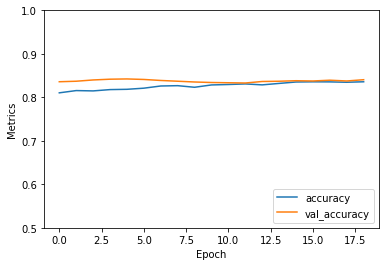

In [ ]:
# Plotting training and validation results

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Metrics')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [ ]:
model_final = load_model("/content/drive/MyDrive/Colab Notebooks/Models/Blood_VGG/best_model.h5")
model_final.save("/content/drive/MyDrive/Colab Notebooks/Models/Blood_VGG/bloodVGG_2.h5")

In [ ]:
# Model evaluation based on validation set

score = model_final.evaluate(x_val, y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.4337109327316284
Test accuracy: 0.8376168012619019


In [ ]:
# Making predictions on test set

y_pred = np.argmax(model_final.predict(x_test), axis=-1)

107/107 [==============================] - 72s 665ms/step


In [ ]:
# Metrics Evaluation

print(classification_report(y_test, y_pred))

print("\nConfusion Matrix\n")
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.80      0.76       244
           1       0.90      0.87      0.88       624
           2       0.86      0.82      0.84       311
           3       0.74      0.67      0.71       579
           4       0.79      0.89      0.84       243
           5       0.62      0.71      0.67       284
           6       0.94      0.93      0.94       666
           7       0.98      0.98      0.98       470

    accuracy                           0.84      3421
   macro avg       0.82      0.83      0.83      3421
weighted avg       0.85      0.84      0.84      3421


Confusion Matrix

[[195   8   0  16  15  10   0   0]
 [  5 540   4  31   4  27  13   0]
 [  8   1 256  15  12   3   6  10]
 [ 34  28  13 389  17  80  18   0]
 [ 11   0   7   7 217   0   1   0]
 [ 15   7   1  52   5 203   1   0]
 [  0  15   7  14   4   3 622   1]
 [  0   0   9   0   2   0   0 459]]


# Image Augmentation

In [ ]:
augmentation = ImageDataGenerator(rotation_range=20,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             vertical_flip=True)
augmentation.fit(x_train)

In [ ]:
history = model_final.fit(augmentation.flow(x_train, y_train, batch_size=32, seed = 42), epochs=50, class_weight = class_weight, callbacks = callbacks, validation_data=(x_val,y_val))

Epoch 1/50
374/374 [==============================] - 287s 763ms/step - loss: 5.2691e-04 - accuracy: 0.7458 - val_loss: 0.4644 - val_accuracy: 0.8294
Epoch 2/50
374/374 [==============================] - 282s 756ms/step - loss: 5.0155e-04 - accuracy: 0.7605 - val_loss: 0.4653 - val_accuracy: 0.8318
Epoch 3/50
374/374 [==============================] - 283s 756ms/step - loss: 4.9731e-04 - accuracy: 0.7541 - val_loss: 0.4695 - val_accuracy: 0.8289
Epoch 4/50
374/374 [==============================] - 284s 760ms/step - loss: 4.8864e-04 - accuracy: 0.7603 - val_loss: 0.4684 - val_accuracy: 0.8277


In [ ]:
# Model evaluation based on validation set

score = model_final.evaluate(x_val, y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.46844956278800964
Test accuracy: 0.8276869058609009


# Reference

Cassimiro, G. (2021) Transfer Learning with VGG16 and Keras. Available at: https://towardsdatascience.com/transfer-learning-with-vgg16-and-keras-50ea161580b4 (Accessed: Mar 14, 2023).
